In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import mojimoji
import re
import jaconv
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import warnings
from sklearn import preprocessing
import MeCab
def parse_text(text, debug=False):
    text = re.sub(r'［[^］]+］', ' ', text)  
#     text = re.sub(r'（[^）]+）', ' ', text)  
    text = re.sub(r'○', ' ', text)    
    text = re.sub(r'×', '', text)
    text = re.sub(r'※', '', text)    
#     text = re.sub(r'｜', ' ', text)
    text = re.sub(r'[\s、]', '' , text)
#     text = re.sub(r'一', ' ', text)
#     text = re.sub(r'…', ' ', text)  
#     text = re.sub(r'―', ' ', text)
    text = re.sub(r'[0-9]', '0', text)
    return text
mecab = MeCab.Tagger('-Owakati')
def tokenize1(text):
    available_norm = ['接尾', '一般', '形容動詞語幹', 'サ変接続']
    node = mecab.parseToNode(text)
    l = []
    while node:
        l.append(node.surface)
        node = node.next
    return ' '.join(l)
traindf=pd.read_csv("data/train.csv")
testdf=pd.read_csv("data/test.csv")
df=pd.concat([traindf,testdf])
df.body=df.body.map(parse_text).map(tokenize1)
traindf.body=traindf.body.map(parse_text).map(tokenize1)
testdf.body=testdf.body.map(parse_text).map(tokenize1)
y = df['author'].values

In [5]:
import logging
import numpy as np
from gensim.models import Word2Vec
import MeCab
import time
from sklearn.preprocessing import normalize
import sys
import re
from tqdm import tqdm

start = time.time()
tokenizer =  MeCab.Tagger("-Owakati")  
sentences = []
print ("Parsing sentences from training set...")

# Loop over each news article.
for review in tqdm(df["body"]):
    try:
        # Split a review into parsed sentences.
        result = tokenizer.parse(review).replace("\u3000","").replace("\n","")
        result = re.sub(r'[0123456789０１２３４５６７８９！＠＃＄％＾＆\-|\\＊\“（）＿■×※⇒—●(：〜＋=)／*&^%$#@!~`){}…\[\]\"\'\”:;<>?＜＞？、。・,./『』【】「」→←○]+', "", result)
        h = result.split(" ")
        h = list(filter(("").__ne__, h))
        sentences.append(h)
    except:
        continue

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

num_features = 200     # Word vector dimensionality
min_word_count = 20   # Minimum word count
num_workers = 40       # Number of threads to run in parallel
context = 10          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words

print ("Training Word2Vec model...")
# Train Word2Vec model.
model = Word2Vec(sentences, workers=num_workers, hs = 0, sg = 1, negative = 10, iter = 25,\
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, seed=1)

model_name = str(num_features) + "features_" + str(min_word_count) + "minwords_" + str(context) + "context_len2alldata"
model.init_sims(replace=True)
# Save Word2Vec model.
print ("Saving Word2Vec model...")
model.save(model_name)
endmodeltime = time.time()

print ("time : ", endmodeltime-start)

  0%|          | 18/4732 [00:00<00:26, 178.63it/s]

Parsing sentences from training set...


100%|██████████| 4732/4732 [00:26<00:00, 181.85it/s]
2020-01-04 13:50:03,759 : INFO : collecting all words and their counts
2020-01-04 13:50:03,761 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training Word2Vec model...


2020-01-04 13:50:08,483 : INFO : collected 147643 word types from a corpus of 23451225 raw words and 4732 sentences
2020-01-04 13:50:08,485 : INFO : Loading a fresh vocabulary
2020-01-04 13:50:09,772 : INFO : effective_min_count=20 retains 34111 unique words (23% of original 147643, drops 113532)
2020-01-04 13:50:09,773 : INFO : effective_min_count=20 leaves 23007329 word corpus (98% of original 23451225, drops 443896)
2020-01-04 13:50:09,959 : INFO : deleting the raw counts dictionary of 147643 items
2020-01-04 13:50:09,964 : INFO : sample=0.001 downsamples 42 most-common words
2020-01-04 13:50:09,966 : INFO : downsampling leaves estimated 15878817 word corpus (69.0% of prior 23007329)
2020-01-04 13:50:10,181 : INFO : estimated required memory for 34111 words and 200 dimensions: 71633100 bytes
2020-01-04 13:50:10,182 : INFO : resetting layer weights
2020-01-04 13:50:20,421 : INFO : training model with 40 workers on 34111 vocabulary and 200 features, using sg=1 hs=0 sample=0.001 negati

2020-01-04 13:51:32,926 : INFO : EPOCH 1 - PROGRESS: at 34.32% examples, 58296 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:51:34,345 : INFO : EPOCH 1 - PROGRESS: at 34.72% examples, 58010 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:51:35,364 : INFO : EPOCH 1 - PROGRESS: at 35.36% examples, 58118 words/s, in_qsize 80, out_qsize 1
2020-01-04 13:51:36,370 : INFO : EPOCH 1 - PROGRESS: at 35.86% examples, 58063 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:51:37,421 : INFO : EPOCH 1 - PROGRESS: at 36.45% examples, 58338 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:51:38,607 : INFO : EPOCH 1 - PROGRESS: at 36.92% examples, 57944 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:51:39,694 : INFO : EPOCH 1 - PROGRESS: at 37.49% examples, 58099 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:51:40,867 : INFO : EPOCH 1 - PROGRESS: at 37.93% examples, 58066 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:51:42,136 : INFO : EPOCH 1 - PROGRESS: at 38.50% examples, 57853 words/s, in_qsize

2020-01-04 13:52:55,482 : INFO : EPOCH 1 - PROGRESS: at 73.37% examples, 58322 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:52:56,517 : INFO : EPOCH 1 - PROGRESS: at 74.01% examples, 58448 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:52:57,720 : INFO : EPOCH 1 - PROGRESS: at 74.26% examples, 58434 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:52:58,895 : INFO : EPOCH 1 - PROGRESS: at 74.70% examples, 58431 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:52:59,899 : INFO : EPOCH 1 - PROGRESS: at 75.25% examples, 58513 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:53:01,032 : INFO : EPOCH 1 - PROGRESS: at 75.78% examples, 58397 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:53:02,033 : INFO : EPOCH 1 - PROGRESS: at 76.20% examples, 58513 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:53:03,059 : INFO : EPOCH 1 - PROGRESS: at 76.80% examples, 58629 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:53:04,155 : INFO : EPOCH 1 - PROGRESS: at 77.30% examples, 58682 words/s, in_qsize

2020-01-04 13:53:53,699 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-04 13:53:53,702 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-04 13:53:53,721 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-04 13:53:53,773 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-04 13:53:53,789 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-04 13:53:53,893 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-04 13:53:53,920 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-04 13:53:53,934 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-04 13:53:53,958 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-04 13:53:54,008 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-04 13:53:54,017 : INFO : worker thread finished; awaiting finish of 5 more t

2020-01-04 13:55:01,285 : INFO : EPOCH 2 - PROGRESS: at 31.97% examples, 58624 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:55:02,376 : INFO : EPOCH 2 - PROGRESS: at 32.80% examples, 58690 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:55:03,494 : INFO : EPOCH 2 - PROGRESS: at 33.20% examples, 58738 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:55:04,663 : INFO : EPOCH 2 - PROGRESS: at 33.60% examples, 58493 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:55:05,871 : INFO : EPOCH 2 - PROGRESS: at 34.11% examples, 58628 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:55:07,195 : INFO : EPOCH 2 - PROGRESS: at 34.72% examples, 58702 words/s, in_qsize 78, out_qsize 1
2020-01-04 13:55:08,276 : INFO : EPOCH 2 - PROGRESS: at 35.38% examples, 58742 words/s, in_qsize 79, out_qsize 1
2020-01-04 13:55:09,339 : INFO : EPOCH 2 - PROGRESS: at 36.05% examples, 59084 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:55:10,677 : INFO : EPOCH 2 - PROGRESS: at 36.79% examples, 59031 words/s, in_qsize

2020-01-04 13:56:22,286 : INFO : EPOCH 2 - PROGRESS: at 73.39% examples, 61119 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:56:23,306 : INFO : EPOCH 2 - PROGRESS: at 74.11% examples, 61404 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:56:24,366 : INFO : EPOCH 2 - PROGRESS: at 74.26% examples, 61193 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:56:25,403 : INFO : EPOCH 2 - PROGRESS: at 74.66% examples, 61185 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:56:26,458 : INFO : EPOCH 2 - PROGRESS: at 75.13% examples, 61214 words/s, in_qsize 80, out_qsize 1
2020-01-04 13:56:27,533 : INFO : EPOCH 2 - PROGRESS: at 75.80% examples, 61207 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:56:28,593 : INFO : EPOCH 2 - PROGRESS: at 76.29% examples, 61363 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:56:29,787 : INFO : EPOCH 2 - PROGRESS: at 77.01% examples, 61525 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:56:30,849 : INFO : EPOCH 2 - PROGRESS: at 77.47% examples, 61451 words/s, in_qsize

2020-01-04 13:57:15,233 : INFO : worker thread finished; awaiting finish of 10 more threads
2020-01-04 13:57:15,300 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-01-04 13:57:15,307 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-01-04 13:57:15,325 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-01-04 13:57:15,394 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-01-04 13:57:15,405 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-01-04 13:57:15,409 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-04 13:57:15,421 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-04 13:57:15,440 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-04 13:57:15,486 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-04 13:57:15,523 : INFO : worker thread finished; awaiting finish of 0 more thread

2020-01-04 13:58:25,769 : INFO : EPOCH 3 - PROGRESS: at 36.62% examples, 64135 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:58:26,779 : INFO : EPOCH 3 - PROGRESS: at 36.98% examples, 63725 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:58:27,897 : INFO : EPOCH 3 - PROGRESS: at 37.51% examples, 63766 words/s, in_qsize 80, out_qsize 1
2020-01-04 13:58:28,941 : INFO : EPOCH 3 - PROGRESS: at 38.19% examples, 63915 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:58:29,968 : INFO : EPOCH 3 - PROGRESS: at 38.57% examples, 63738 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:58:31,079 : INFO : EPOCH 3 - PROGRESS: at 39.03% examples, 63909 words/s, in_qsize 80, out_qsize 1
2020-01-04 13:58:32,140 : INFO : EPOCH 3 - PROGRESS: at 39.86% examples, 64382 words/s, in_qsize 78, out_qsize 2
2020-01-04 13:58:33,158 : INFO : EPOCH 3 - PROGRESS: at 40.43% examples, 64247 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:58:34,166 : INFO : EPOCH 3 - PROGRESS: at 41.31% examples, 64596 words/s, in_qsize

2020-01-04 13:59:45,203 : INFO : EPOCH 3 - PROGRESS: at 77.96% examples, 64839 words/s, in_qsize 78, out_qsize 2
2020-01-04 13:59:46,320 : INFO : EPOCH 3 - PROGRESS: at 78.61% examples, 64951 words/s, in_qsize 79, out_qsize 1
2020-01-04 13:59:47,406 : INFO : EPOCH 3 - PROGRESS: at 79.02% examples, 64846 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:59:48,495 : INFO : EPOCH 3 - PROGRESS: at 79.44% examples, 64848 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:59:49,818 : INFO : EPOCH 3 - PROGRESS: at 79.92% examples, 64712 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:59:51,115 : INFO : EPOCH 3 - PROGRESS: at 80.41% examples, 64489 words/s, in_qsize 79, out_qsize 2
2020-01-04 13:59:52,335 : INFO : EPOCH 3 - PROGRESS: at 80.64% examples, 64256 words/s, in_qsize 79, out_qsize 0
2020-01-04 13:59:53,458 : INFO : EPOCH 3 - PROGRESS: at 81.36% examples, 64321 words/s, in_qsize 80, out_qsize 0
2020-01-04 13:59:54,698 : INFO : EPOCH 3 - PROGRESS: at 81.68% examples, 64284 words/s, in_qsize

2020-01-04 14:00:57,408 : INFO : worker thread finished; awaiting finish of 23 more threads
2020-01-04 14:00:57,577 : INFO : worker thread finished; awaiting finish of 22 more threads
2020-01-04 14:00:57,598 : INFO : worker thread finished; awaiting finish of 21 more threads
2020-01-04 14:00:57,620 : INFO : worker thread finished; awaiting finish of 20 more threads
2020-01-04 14:00:57,877 : INFO : worker thread finished; awaiting finish of 19 more threads
2020-01-04 14:00:57,988 : INFO : worker thread finished; awaiting finish of 18 more threads
2020-01-04 14:00:58,108 : INFO : EPOCH 3 - PROGRESS: at 99.26% examples, 56371 words/s, in_qsize 17, out_qsize 1
2020-01-04 14:00:58,109 : INFO : worker thread finished; awaiting finish of 17 more threads
2020-01-04 14:00:58,136 : INFO : worker thread finished; awaiting finish of 16 more threads
2020-01-04 14:00:58,252 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-04 14:00:58,260 : INFO : worker thread finished; aw

2020-01-04 14:02:00,886 : INFO : EPOCH 4 - PROGRESS: at 24.87% examples, 49605 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:02:01,894 : INFO : EPOCH 4 - PROGRESS: at 25.13% examples, 49504 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:02:02,926 : INFO : EPOCH 4 - PROGRESS: at 25.89% examples, 49998 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:02:04,313 : INFO : EPOCH 4 - PROGRESS: at 26.18% examples, 49795 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:02:05,418 : INFO : EPOCH 4 - PROGRESS: at 26.48% examples, 49556 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:02:06,494 : INFO : EPOCH 4 - PROGRESS: at 26.73% examples, 49320 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:02:07,794 : INFO : EPOCH 4 - PROGRESS: at 26.99% examples, 48774 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:02:09,259 : INFO : EPOCH 4 - PROGRESS: at 27.24% examples, 48191 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:02:10,406 : INFO : EPOCH 4 - PROGRESS: at 27.83% examples, 48176 words/s, in_qsize

2020-01-04 14:03:24,532 : INFO : EPOCH 4 - PROGRESS: at 56.04% examples, 48850 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:03:25,716 : INFO : EPOCH 4 - PROGRESS: at 56.66% examples, 49013 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:03:26,834 : INFO : EPOCH 4 - PROGRESS: at 57.31% examples, 49206 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:03:27,947 : INFO : EPOCH 4 - PROGRESS: at 57.57% examples, 49087 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:03:29,119 : INFO : EPOCH 4 - PROGRESS: at 58.37% examples, 49179 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:03:30,448 : INFO : EPOCH 4 - PROGRESS: at 58.94% examples, 49218 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:03:31,610 : INFO : EPOCH 4 - PROGRESS: at 59.53% examples, 49353 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:03:32,639 : INFO : EPOCH 4 - PROGRESS: at 59.95% examples, 49352 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:03:33,888 : INFO : EPOCH 4 - PROGRESS: at 60.50% examples, 49304 words/s, in_qsize

2020-01-04 14:04:47,327 : INFO : EPOCH 4 - PROGRESS: at 89.45% examples, 49634 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:04:48,502 : INFO : EPOCH 4 - PROGRESS: at 90.03% examples, 49765 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:04:49,505 : INFO : EPOCH 4 - PROGRESS: at 90.22% examples, 49766 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:04:50,830 : INFO : EPOCH 4 - PROGRESS: at 90.68% examples, 49790 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:04:52,015 : INFO : EPOCH 4 - PROGRESS: at 91.19% examples, 49787 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:04:53,377 : INFO : EPOCH 4 - PROGRESS: at 91.59% examples, 49688 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:04:54,446 : INFO : EPOCH 4 - PROGRESS: at 92.20% examples, 49764 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:04:55,755 : INFO : EPOCH 4 - PROGRESS: at 92.84% examples, 49693 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:04:57,293 : INFO : EPOCH 4 - PROGRESS: at 93.51% examples, 49709 words/s, in_qsize

2020-01-04 14:05:33,964 : INFO : EPOCH 5 - PROGRESS: at 7.33% examples, 42722 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:05:35,248 : INFO : EPOCH 5 - PROGRESS: at 7.69% examples, 42516 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:05:36,377 : INFO : EPOCH 5 - PROGRESS: at 8.31% examples, 43411 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:05:37,416 : INFO : EPOCH 5 - PROGRESS: at 9.19% examples, 44131 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:05:38,441 : INFO : EPOCH 5 - PROGRESS: at 9.38% examples, 43626 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:05:39,538 : INFO : EPOCH 5 - PROGRESS: at 9.89% examples, 44298 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:05:40,538 : INFO : EPOCH 5 - PROGRESS: at 10.25% examples, 44086 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:05:41,797 : INFO : EPOCH 5 - PROGRESS: at 10.69% examples, 44391 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:05:43,082 : INFO : EPOCH 5 - PROGRESS: at 11.50% examples, 45097 words/s, in_qsize 79, o

2020-01-04 14:06:58,626 : INFO : EPOCH 5 - PROGRESS: at 40.81% examples, 47334 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:06:59,632 : INFO : EPOCH 5 - PROGRESS: at 41.34% examples, 47510 words/s, in_qsize 79, out_qsize 1
2020-01-04 14:07:00,827 : INFO : EPOCH 5 - PROGRESS: at 41.76% examples, 47453 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:07:01,833 : INFO : EPOCH 5 - PROGRESS: at 42.03% examples, 47356 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:07:03,027 : INFO : EPOCH 5 - PROGRESS: at 42.35% examples, 47376 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:07:04,238 : INFO : EPOCH 5 - PROGRESS: at 42.69% examples, 47368 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:07:05,541 : INFO : EPOCH 5 - PROGRESS: at 43.28% examples, 47603 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:07:06,738 : INFO : EPOCH 5 - PROGRESS: at 43.70% examples, 47570 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:07:07,797 : INFO : EPOCH 5 - PROGRESS: at 44.10% examples, 47620 words/s, in_qsize

2020-01-04 14:08:23,677 : INFO : EPOCH 5 - PROGRESS: at 74.24% examples, 48054 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:08:24,916 : INFO : EPOCH 5 - PROGRESS: at 74.37% examples, 47876 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:08:25,928 : INFO : EPOCH 5 - PROGRESS: at 74.83% examples, 48029 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:08:27,130 : INFO : EPOCH 5 - PROGRESS: at 75.23% examples, 47966 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:08:28,237 : INFO : EPOCH 5 - PROGRESS: at 75.72% examples, 47919 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:08:29,379 : INFO : EPOCH 5 - PROGRESS: at 76.08% examples, 47946 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:08:30,596 : INFO : EPOCH 5 - PROGRESS: at 76.52% examples, 47995 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:08:31,682 : INFO : EPOCH 5 - PROGRESS: at 77.09% examples, 48158 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:08:33,152 : INFO : EPOCH 5 - PROGRESS: at 77.47% examples, 48016 words/s, in_qsize

2020-01-04 14:09:31,101 : INFO : worker thread finished; awaiting finish of 23 more threads
2020-01-04 14:09:31,351 : INFO : worker thread finished; awaiting finish of 22 more threads
2020-01-04 14:09:31,392 : INFO : worker thread finished; awaiting finish of 21 more threads
2020-01-04 14:09:31,457 : INFO : worker thread finished; awaiting finish of 20 more threads
2020-01-04 14:09:31,545 : INFO : worker thread finished; awaiting finish of 19 more threads
2020-01-04 14:09:31,652 : INFO : worker thread finished; awaiting finish of 18 more threads
2020-01-04 14:09:31,712 : INFO : worker thread finished; awaiting finish of 17 more threads
2020-01-04 14:09:31,784 : INFO : EPOCH 5 - PROGRESS: at 99.39% examples, 48434 words/s, in_qsize 16, out_qsize 1
2020-01-04 14:09:31,789 : INFO : worker thread finished; awaiting finish of 16 more threads
2020-01-04 14:09:31,830 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-04 14:09:31,834 : INFO : worker thread finished; aw

2020-01-04 14:10:33,530 : INFO : EPOCH 6 - PROGRESS: at 24.22% examples, 48037 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:10:34,588 : INFO : EPOCH 6 - PROGRESS: at 24.49% examples, 47891 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:10:35,778 : INFO : EPOCH 6 - PROGRESS: at 24.98% examples, 47931 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:10:36,787 : INFO : EPOCH 6 - PROGRESS: at 25.63% examples, 48103 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:10:37,907 : INFO : EPOCH 6 - PROGRESS: at 26.04% examples, 48429 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:10:39,004 : INFO : EPOCH 6 - PROGRESS: at 26.27% examples, 48299 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:10:40,548 : INFO : EPOCH 6 - PROGRESS: at 26.94% examples, 48158 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:10:41,580 : INFO : EPOCH 6 - PROGRESS: at 27.28% examples, 48232 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:10:42,705 : INFO : EPOCH 6 - PROGRESS: at 27.77% examples, 48179 words/s, in_qsize

2020-01-04 14:11:56,329 : INFO : EPOCH 6 - PROGRESS: at 59.97% examples, 52336 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:11:57,669 : INFO : EPOCH 6 - PROGRESS: at 60.74% examples, 52315 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:11:58,883 : INFO : EPOCH 6 - PROGRESS: at 60.99% examples, 52158 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:11:59,906 : INFO : EPOCH 6 - PROGRESS: at 61.75% examples, 52279 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:12:01,017 : INFO : EPOCH 6 - PROGRESS: at 62.45% examples, 52402 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:12:02,396 : INFO : EPOCH 6 - PROGRESS: at 62.68% examples, 52144 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:12:03,472 : INFO : EPOCH 6 - PROGRESS: at 63.04% examples, 52112 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:12:04,853 : INFO : EPOCH 6 - PROGRESS: at 63.59% examples, 51992 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:12:05,971 : INFO : EPOCH 6 - PROGRESS: at 64.22% examples, 52116 words/s, in_qsize

2020-01-04 14:13:19,859 : INFO : EPOCH 6 - PROGRESS: at 91.99% examples, 51137 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:13:21,049 : INFO : EPOCH 6 - PROGRESS: at 92.35% examples, 51088 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:13:22,341 : INFO : EPOCH 6 - PROGRESS: at 93.22% examples, 51118 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:13:23,363 : INFO : EPOCH 6 - PROGRESS: at 93.55% examples, 51044 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:13:24,449 : INFO : EPOCH 6 - PROGRESS: at 93.72% examples, 50977 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:13:25,489 : INFO : EPOCH 6 - PROGRESS: at 94.25% examples, 51113 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:13:26,796 : INFO : EPOCH 6 - PROGRESS: at 94.72% examples, 51031 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:13:27,909 : INFO : EPOCH 6 - PROGRESS: at 94.97% examples, 50980 words/s, in_qsize 79, out_qsize 2
2020-01-04 14:13:28,959 : INFO : EPOCH 6 - PROGRESS: at 95.65% examples, 51031 words/s, in_qsize

2020-01-04 14:14:05,540 : INFO : EPOCH 7 - PROGRESS: at 9.57% examples, 42549 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:14:06,937 : INFO : EPOCH 7 - PROGRESS: at 10.02% examples, 42569 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:14:08,142 : INFO : EPOCH 7 - PROGRESS: at 10.55% examples, 42947 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:14:09,155 : INFO : EPOCH 7 - PROGRESS: at 11.33% examples, 44379 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:14:10,245 : INFO : EPOCH 7 - PROGRESS: at 11.62% examples, 43903 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:14:11,311 : INFO : EPOCH 7 - PROGRESS: at 11.94% examples, 43356 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:14:12,577 : INFO : EPOCH 7 - PROGRESS: at 12.36% examples, 43378 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:14:13,599 : INFO : EPOCH 7 - PROGRESS: at 12.72% examples, 43231 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:14:14,651 : INFO : EPOCH 7 - PROGRESS: at 13.25% examples, 44239 words/s, in_qsize 

2020-01-04 14:15:27,661 : INFO : EPOCH 7 - PROGRESS: at 42.92% examples, 48678 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:15:28,697 : INFO : EPOCH 7 - PROGRESS: at 43.26% examples, 48721 words/s, in_qsize 77, out_qsize 2
2020-01-04 14:15:29,843 : INFO : EPOCH 7 - PROGRESS: at 43.66% examples, 48663 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:15:30,985 : INFO : EPOCH 7 - PROGRESS: at 44.04% examples, 48695 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:15:32,075 : INFO : EPOCH 7 - PROGRESS: at 44.65% examples, 48774 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:15:33,125 : INFO : EPOCH 7 - PROGRESS: at 45.12% examples, 48645 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:15:34,258 : INFO : EPOCH 7 - PROGRESS: at 45.56% examples, 48641 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:15:35,341 : INFO : EPOCH 7 - PROGRESS: at 45.98% examples, 48649 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:15:36,479 : INFO : EPOCH 7 - PROGRESS: at 46.64% examples, 48564 words/s, in_qsize

2020-01-04 14:16:49,894 : INFO : EPOCH 7 - PROGRESS: at 77.87% examples, 50660 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:16:50,900 : INFO : EPOCH 7 - PROGRESS: at 78.42% examples, 50815 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:16:51,959 : INFO : EPOCH 7 - PROGRESS: at 78.97% examples, 50882 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:16:53,029 : INFO : EPOCH 7 - PROGRESS: at 79.33% examples, 50921 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:16:54,164 : INFO : EPOCH 7 - PROGRESS: at 79.97% examples, 51041 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:16:55,283 : INFO : EPOCH 7 - PROGRESS: at 80.56% examples, 51130 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:16:56,304 : INFO : EPOCH 7 - PROGRESS: at 81.28% examples, 51313 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:16:57,420 : INFO : EPOCH 7 - PROGRESS: at 81.59% examples, 51395 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:16:58,538 : INFO : EPOCH 7 - PROGRESS: at 82.33% examples, 51556 words/s, in_qsize

2020-01-04 14:17:34,265 : INFO : EPOCH 8 - PROGRESS: at 0.68% examples, 12073 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:17:35,386 : INFO : EPOCH 8 - PROGRESS: at 1.42% examples, 32126 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:17:36,513 : INFO : EPOCH 8 - PROGRESS: at 2.20% examples, 40047 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:17:37,562 : INFO : EPOCH 8 - PROGRESS: at 2.56% examples, 42664 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:17:38,739 : INFO : EPOCH 8 - PROGRESS: at 3.21% examples, 47619 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:17:39,934 : INFO : EPOCH 8 - PROGRESS: at 3.93% examples, 50598 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:17:41,004 : INFO : EPOCH 8 - PROGRESS: at 4.54% examples, 53908 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:17:42,058 : INFO : EPOCH 8 - PROGRESS: at 5.16% examples, 57163 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:17:43,106 : INFO : EPOCH 8 - PROGRESS: at 5.33% examples, 54949 words/s, in_qsize 79, out_

2020-01-04 14:18:54,799 : INFO : EPOCH 8 - PROGRESS: at 44.72% examples, 66683 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:18:55,817 : INFO : EPOCH 8 - PROGRESS: at 45.46% examples, 66532 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:18:56,881 : INFO : EPOCH 8 - PROGRESS: at 45.94% examples, 66407 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:18:57,984 : INFO : EPOCH 8 - PROGRESS: at 46.79% examples, 66401 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:18:59,044 : INFO : EPOCH 8 - PROGRESS: at 47.34% examples, 66680 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:19:00,092 : INFO : EPOCH 8 - PROGRESS: at 47.78% examples, 66672 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:19:01,188 : INFO : EPOCH 8 - PROGRESS: at 48.16% examples, 66484 words/s, in_qsize 78, out_qsize 3
2020-01-04 14:19:02,268 : INFO : EPOCH 8 - PROGRESS: at 48.71% examples, 66599 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:19:03,428 : INFO : EPOCH 8 - PROGRESS: at 49.22% examples, 66755 words/s, in_qsize

2020-01-04 14:20:14,807 : INFO : EPOCH 8 - PROGRESS: at 86.03% examples, 66416 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:20:15,958 : INFO : EPOCH 8 - PROGRESS: at 86.71% examples, 66485 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:20:17,025 : INFO : EPOCH 8 - PROGRESS: at 87.05% examples, 66455 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:20:18,075 : INFO : EPOCH 8 - PROGRESS: at 87.72% examples, 66505 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:20:19,120 : INFO : EPOCH 8 - PROGRESS: at 88.23% examples, 66534 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:20:20,146 : INFO : EPOCH 8 - PROGRESS: at 88.78% examples, 66496 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:20:21,225 : INFO : EPOCH 8 - PROGRESS: at 89.33% examples, 66359 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:20:22,324 : INFO : EPOCH 8 - PROGRESS: at 90.00% examples, 66482 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:20:23,445 : INFO : EPOCH 8 - PROGRESS: at 90.28% examples, 66510 words/s, in_qsize

2020-01-04 14:20:59,595 : INFO : EPOCH 9 - PROGRESS: at 9.43% examples, 57700 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:21:00,733 : INFO : EPOCH 9 - PROGRESS: at 10.08% examples, 58425 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:21:01,820 : INFO : EPOCH 9 - PROGRESS: at 10.61% examples, 58648 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:21:02,838 : INFO : EPOCH 9 - PROGRESS: at 11.41% examples, 59811 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:21:03,876 : INFO : EPOCH 9 - PROGRESS: at 11.86% examples, 59750 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:21:05,021 : INFO : EPOCH 9 - PROGRESS: at 12.47% examples, 59547 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:21:06,224 : INFO : EPOCH 9 - PROGRESS: at 13.08% examples, 59932 words/s, in_qsize 78, out_qsize 5
2020-01-04 14:21:07,325 : INFO : EPOCH 9 - PROGRESS: at 13.82% examples, 60644 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:21:08,718 : INFO : EPOCH 9 - PROGRESS: at 14.45% examples, 60329 words/s, in_qsize 

2020-01-04 14:22:19,898 : INFO : EPOCH 9 - PROGRESS: at 52.26% examples, 65741 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:22:21,019 : INFO : EPOCH 9 - PROGRESS: at 52.62% examples, 65427 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:22:22,123 : INFO : EPOCH 9 - PROGRESS: at 53.23% examples, 65607 words/s, in_qsize 79, out_qsize 1
2020-01-04 14:22:23,336 : INFO : EPOCH 9 - PROGRESS: at 53.97% examples, 65893 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:22:24,408 : INFO : EPOCH 9 - PROGRESS: at 54.82% examples, 66120 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:22:25,588 : INFO : EPOCH 9 - PROGRESS: at 55.28% examples, 65885 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:22:26,709 : INFO : EPOCH 9 - PROGRESS: at 55.92% examples, 65825 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:22:27,752 : INFO : EPOCH 9 - PROGRESS: at 56.42% examples, 66004 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:22:28,867 : INFO : EPOCH 9 - PROGRESS: at 57.06% examples, 66099 words/s, in_qsize

2020-01-04 14:23:39,670 : INFO : EPOCH 9 - PROGRESS: at 94.91% examples, 66792 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:23:40,707 : INFO : EPOCH 9 - PROGRESS: at 95.63% examples, 66814 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:23:41,831 : INFO : EPOCH 9 - PROGRESS: at 96.22% examples, 66914 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:23:43,230 : INFO : EPOCH 9 - PROGRESS: at 96.87% examples, 66744 words/s, in_qsize 68, out_qsize 0
2020-01-04 14:23:44,279 : INFO : EPOCH 9 - PROGRESS: at 97.38% examples, 66637 words/s, in_qsize 59, out_qsize 0
2020-01-04 14:23:45,345 : INFO : EPOCH 9 - PROGRESS: at 98.08% examples, 66818 words/s, in_qsize 42, out_qsize 0
2020-01-04 14:23:45,565 : INFO : worker thread finished; awaiting finish of 39 more threads
2020-01-04 14:23:45,575 : INFO : worker thread finished; awaiting finish of 38 more threads
2020-01-04 14:23:45,577 : INFO : worker thread finished; awaiting finish of 37 more threads
2020-01-04 14:23:45,657 : INFO : worker thread

2020-01-04 14:24:22,846 : INFO : EPOCH 10 - PROGRESS: at 18.09% examples, 62855 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:24:23,931 : INFO : EPOCH 10 - PROGRESS: at 18.58% examples, 63181 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:24:25,002 : INFO : EPOCH 10 - PROGRESS: at 19.34% examples, 63415 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:24:26,138 : INFO : EPOCH 10 - PROGRESS: at 19.89% examples, 63599 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:24:27,241 : INFO : EPOCH 10 - PROGRESS: at 20.56% examples, 63082 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:24:28,297 : INFO : EPOCH 10 - PROGRESS: at 21.09% examples, 62859 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:24:29,304 : INFO : EPOCH 10 - PROGRESS: at 21.96% examples, 63400 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:24:30,349 : INFO : EPOCH 10 - PROGRESS: at 22.53% examples, 63260 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:24:31,390 : INFO : EPOCH 10 - PROGRESS: at 22.95% examples, 63867 words/s,

2020-01-04 14:25:41,147 : INFO : EPOCH 10 - PROGRESS: at 60.08% examples, 66522 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:25:42,299 : INFO : EPOCH 10 - PROGRESS: at 60.82% examples, 66528 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:25:43,330 : INFO : EPOCH 10 - PROGRESS: at 61.41% examples, 66484 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:25:44,518 : INFO : EPOCH 10 - PROGRESS: at 62.51% examples, 66797 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:25:45,599 : INFO : EPOCH 10 - PROGRESS: at 62.74% examples, 66519 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:25:46,869 : INFO : EPOCH 10 - PROGRESS: at 63.50% examples, 66464 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:25:47,884 : INFO : EPOCH 10 - PROGRESS: at 64.26% examples, 66693 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:25:48,904 : INFO : EPOCH 10 - PROGRESS: at 64.92% examples, 66860 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:25:49,929 : INFO : EPOCH 10 - PROGRESS: at 65.53% examples, 66832 words/s,

2020-01-04 14:26:52,408 : INFO : worker thread finished; awaiting finish of 31 more threads
2020-01-04 14:26:52,478 : INFO : worker thread finished; awaiting finish of 30 more threads
2020-01-04 14:26:52,643 : INFO : worker thread finished; awaiting finish of 29 more threads
2020-01-04 14:26:52,842 : INFO : worker thread finished; awaiting finish of 28 more threads
2020-01-04 14:26:52,894 : INFO : worker thread finished; awaiting finish of 27 more threads
2020-01-04 14:26:52,975 : INFO : worker thread finished; awaiting finish of 26 more threads
2020-01-04 14:26:53,044 : INFO : worker thread finished; awaiting finish of 25 more threads
2020-01-04 14:26:53,069 : INFO : worker thread finished; awaiting finish of 24 more threads
2020-01-04 14:26:53,109 : INFO : worker thread finished; awaiting finish of 23 more threads
2020-01-04 14:26:53,259 : INFO : EPOCH 10 - PROGRESS: at 99.01% examples, 67419 words/s, in_qsize 22, out_qsize 1
2020-01-04 14:26:53,267 : INFO : worker thread finished; a

2020-01-04 14:27:45,247 : INFO : EPOCH 11 - PROGRESS: at 25.57% examples, 60399 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:27:46,378 : INFO : EPOCH 11 - PROGRESS: at 26.14% examples, 60829 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:27:47,429 : INFO : EPOCH 11 - PROGRESS: at 26.54% examples, 61073 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:27:48,596 : INFO : EPOCH 11 - PROGRESS: at 27.09% examples, 60548 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:27:49,621 : INFO : EPOCH 11 - PROGRESS: at 27.75% examples, 60923 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:27:50,715 : INFO : EPOCH 11 - PROGRESS: at 28.15% examples, 60917 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:27:51,768 : INFO : EPOCH 11 - PROGRESS: at 29.06% examples, 61654 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:27:52,963 : INFO : EPOCH 11 - PROGRESS: at 29.50% examples, 61394 words/s, in_qsize 80, out_qsize 4
2020-01-04 14:27:54,157 : INFO : EPOCH 11 - PROGRESS: at 29.84% examples, 60935 words/s,

2020-01-04 14:29:04,687 : INFO : EPOCH 11 - PROGRESS: at 66.99% examples, 63897 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:29:05,860 : INFO : EPOCH 11 - PROGRESS: at 67.69% examples, 63794 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:29:06,870 : INFO : EPOCH 11 - PROGRESS: at 68.30% examples, 63735 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:29:07,874 : INFO : EPOCH 11 - PROGRESS: at 68.98% examples, 63839 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:29:08,936 : INFO : EPOCH 11 - PROGRESS: at 69.51% examples, 63844 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:29:10,173 : INFO : EPOCH 11 - PROGRESS: at 69.89% examples, 63661 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:29:11,229 : INFO : EPOCH 11 - PROGRESS: at 70.46% examples, 63722 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:29:12,239 : INFO : EPOCH 11 - PROGRESS: at 71.24% examples, 63986 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:29:13,264 : INFO : EPOCH 11 - PROGRESS: at 71.66% examples, 63805 words/s,

2020-01-04 14:30:06,320 : INFO : worker thread finished; awaiting finish of 20 more threads
2020-01-04 14:30:06,451 : INFO : worker thread finished; awaiting finish of 19 more threads
2020-01-04 14:30:06,511 : INFO : worker thread finished; awaiting finish of 18 more threads
2020-01-04 14:30:06,517 : INFO : worker thread finished; awaiting finish of 17 more threads
2020-01-04 14:30:06,523 : INFO : worker thread finished; awaiting finish of 16 more threads
2020-01-04 14:30:06,527 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-04 14:30:06,575 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-04 14:30:06,608 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-04 14:30:06,635 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-04 14:30:06,739 : INFO : worker thread finished; awaiting finish of 11 more threads
2020-01-04 14:30:06,742 : INFO : worker thread finished; awaiting finish of 10 m

2020-01-04 14:31:06,474 : INFO : EPOCH 12 - PROGRESS: at 31.97% examples, 66144 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:31:07,539 : INFO : EPOCH 12 - PROGRESS: at 32.80% examples, 66341 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:31:08,606 : INFO : EPOCH 12 - PROGRESS: at 33.33% examples, 66460 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:31:09,634 : INFO : EPOCH 12 - PROGRESS: at 33.77% examples, 66263 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:31:10,804 : INFO : EPOCH 12 - PROGRESS: at 34.34% examples, 66242 words/s, in_qsize 79, out_qsize 1
2020-01-04 14:31:11,862 : INFO : EPOCH 12 - PROGRESS: at 34.74% examples, 66178 words/s, in_qsize 79, out_qsize 1
2020-01-04 14:31:13,006 : INFO : EPOCH 12 - PROGRESS: at 35.46% examples, 66115 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:31:14,019 : INFO : EPOCH 12 - PROGRESS: at 36.24% examples, 66579 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:31:15,369 : INFO : EPOCH 12 - PROGRESS: at 36.94% examples, 66265 words/s,

2020-01-04 14:32:26,319 : INFO : EPOCH 12 - PROGRESS: at 75.55% examples, 67150 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:32:27,321 : INFO : EPOCH 12 - PROGRESS: at 76.08% examples, 67242 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:32:28,423 : INFO : EPOCH 12 - PROGRESS: at 76.67% examples, 67499 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:32:29,447 : INFO : EPOCH 12 - PROGRESS: at 77.32% examples, 67482 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:32:30,529 : INFO : EPOCH 12 - PROGRESS: at 77.70% examples, 67272 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:32:31,546 : INFO : EPOCH 12 - PROGRESS: at 78.21% examples, 67286 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:32:32,553 : INFO : EPOCH 12 - PROGRESS: at 78.72% examples, 67388 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:32:33,750 : INFO : EPOCH 12 - PROGRESS: at 79.10% examples, 67241 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:32:34,792 : INFO : EPOCH 12 - PROGRESS: at 79.84% examples, 67400 words/s,

2020-01-04 14:33:12,503 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-01-04 14:33:12,520 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-04 14:33:12,528 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-04 14:33:12,594 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-04 14:33:12,596 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-04 14:33:12,597 : INFO : EPOCH - 12 : training on 23451225 raw words (12658643 effective words) took 185.6s, 68206 effective words/s
2020-01-04 14:33:13,746 : INFO : EPOCH 13 - PROGRESS: at 0.15% examples, 4871 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:33:14,764 : INFO : EPOCH 13 - PROGRESS: at 0.42% examples, 9041 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:33:15,765 : INFO : EPOCH 13 - PROGRESS: at 0.99% examples, 25862 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:33:16,795 : INFO : EPOCH 13 - PROGRESS: at 1.67% exam

2020-01-04 14:34:25,425 : INFO : EPOCH 13 - PROGRESS: at 39.22% examples, 66514 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:34:26,592 : INFO : EPOCH 13 - PROGRESS: at 39.98% examples, 66897 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:34:27,600 : INFO : EPOCH 13 - PROGRESS: at 40.53% examples, 66617 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:34:28,665 : INFO : EPOCH 13 - PROGRESS: at 41.34% examples, 66792 words/s, in_qsize 79, out_qsize 2
2020-01-04 14:34:29,802 : INFO : EPOCH 13 - PROGRESS: at 41.99% examples, 66945 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:34:30,805 : INFO : EPOCH 13 - PROGRESS: at 42.27% examples, 66743 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:34:31,814 : INFO : EPOCH 13 - PROGRESS: at 42.69% examples, 66634 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:34:32,896 : INFO : EPOCH 13 - PROGRESS: at 43.28% examples, 66962 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:34:33,898 : INFO : EPOCH 13 - PROGRESS: at 43.72% examples, 66915 words/s,

2020-01-04 14:35:44,251 : INFO : EPOCH 13 - PROGRESS: at 81.80% examples, 67563 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:35:45,397 : INFO : EPOCH 13 - PROGRESS: at 82.42% examples, 67578 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:35:46,476 : INFO : EPOCH 13 - PROGRESS: at 82.86% examples, 67695 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:35:47,492 : INFO : EPOCH 13 - PROGRESS: at 83.20% examples, 67485 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:35:48,569 : INFO : EPOCH 13 - PROGRESS: at 84.00% examples, 67806 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:35:49,596 : INFO : EPOCH 13 - PROGRESS: at 84.51% examples, 67845 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:35:50,616 : INFO : EPOCH 13 - PROGRESS: at 84.83% examples, 67629 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:35:51,723 : INFO : EPOCH 13 - PROGRESS: at 85.40% examples, 67554 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:35:52,813 : INFO : EPOCH 13 - PROGRESS: at 86.01% examples, 67652 words/s,

2020-01-04 14:36:28,282 : INFO : EPOCH 14 - PROGRESS: at 5.14% examples, 57864 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:36:29,308 : INFO : EPOCH 14 - PROGRESS: at 5.28% examples, 55135 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:36:30,488 : INFO : EPOCH 14 - PROGRESS: at 5.81% examples, 56789 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:36:31,559 : INFO : EPOCH 14 - PROGRESS: at 6.47% examples, 59933 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:36:32,651 : INFO : EPOCH 14 - PROGRESS: at 6.97% examples, 59880 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:36:33,679 : INFO : EPOCH 14 - PROGRESS: at 7.65% examples, 60431 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:36:34,752 : INFO : EPOCH 14 - PROGRESS: at 8.35% examples, 61382 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:36:36,002 : INFO : EPOCH 14 - PROGRESS: at 9.28% examples, 61879 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:36:37,186 : INFO : EPOCH 14 - PROGRESS: at 9.87% examples, 61865 words/s, in_qsize

2020-01-04 14:37:46,597 : INFO : EPOCH 14 - PROGRESS: at 47.87% examples, 66818 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:37:47,850 : INFO : EPOCH 14 - PROGRESS: at 48.50% examples, 66837 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:37:48,887 : INFO : EPOCH 14 - PROGRESS: at 48.84% examples, 66880 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:37:49,941 : INFO : EPOCH 14 - PROGRESS: at 49.43% examples, 67034 words/s, in_qsize 79, out_qsize 1
2020-01-04 14:37:50,969 : INFO : EPOCH 14 - PROGRESS: at 49.92% examples, 66972 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:37:52,102 : INFO : EPOCH 14 - PROGRESS: at 50.36% examples, 66777 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:37:53,166 : INFO : EPOCH 14 - PROGRESS: at 50.89% examples, 66971 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:37:54,254 : INFO : EPOCH 14 - PROGRESS: at 51.37% examples, 66762 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:37:55,282 : INFO : EPOCH 14 - PROGRESS: at 51.99% examples, 66901 words/s,

2020-01-04 14:39:06,204 : INFO : EPOCH 14 - PROGRESS: at 90.17% examples, 67759 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:39:07,238 : INFO : EPOCH 14 - PROGRESS: at 90.55% examples, 67756 words/s, in_qsize 80, out_qsize 2
2020-01-04 14:39:08,260 : INFO : EPOCH 14 - PROGRESS: at 91.12% examples, 67797 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:39:09,263 : INFO : EPOCH 14 - PROGRESS: at 91.72% examples, 67772 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:39:10,331 : INFO : EPOCH 14 - PROGRESS: at 92.43% examples, 67806 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:39:11,443 : INFO : EPOCH 14 - PROGRESS: at 93.17% examples, 67739 words/s, in_qsize 79, out_qsize 2
2020-01-04 14:39:12,477 : INFO : EPOCH 14 - PROGRESS: at 93.62% examples, 67648 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:39:13,598 : INFO : EPOCH 14 - PROGRESS: at 94.00% examples, 67692 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:39:14,919 : INFO : EPOCH 14 - PROGRESS: at 94.74% examples, 67666 words/s,

2020-01-04 14:39:49,883 : INFO : EPOCH 15 - PROGRESS: at 13.72% examples, 61949 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:39:51,137 : INFO : EPOCH 15 - PROGRESS: at 14.45% examples, 62021 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:39:52,263 : INFO : EPOCH 15 - PROGRESS: at 15.03% examples, 62362 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:39:53,353 : INFO : EPOCH 15 - PROGRESS: at 15.55% examples, 62010 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:39:54,536 : INFO : EPOCH 15 - PROGRESS: at 16.27% examples, 62906 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:39:55,614 : INFO : EPOCH 15 - PROGRESS: at 16.57% examples, 62485 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:39:56,742 : INFO : EPOCH 15 - PROGRESS: at 17.41% examples, 63323 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:39:57,927 : INFO : EPOCH 15 - PROGRESS: at 18.13% examples, 63892 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:39:59,195 : INFO : EPOCH 15 - PROGRESS: at 18.62% examples, 63750 words/s,

2020-01-04 14:41:10,650 : INFO : EPOCH 15 - PROGRESS: at 57.25% examples, 67132 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:41:11,696 : INFO : EPOCH 15 - PROGRESS: at 57.57% examples, 66887 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:41:12,772 : INFO : EPOCH 15 - PROGRESS: at 58.18% examples, 66797 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:41:13,912 : INFO : EPOCH 15 - PROGRESS: at 58.96% examples, 66828 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:41:14,953 : INFO : EPOCH 15 - PROGRESS: at 59.55% examples, 67050 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:41:15,965 : INFO : EPOCH 15 - PROGRESS: at 60.04% examples, 66890 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:41:17,055 : INFO : EPOCH 15 - PROGRESS: at 60.69% examples, 66778 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:41:18,258 : INFO : EPOCH 15 - PROGRESS: at 61.24% examples, 66652 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:41:19,269 : INFO : EPOCH 15 - PROGRESS: at 62.28% examples, 67000 words/s,

2020-01-04 14:42:27,660 : INFO : worker thread finished; awaiting finish of 37 more threads
2020-01-04 14:42:27,663 : INFO : worker thread finished; awaiting finish of 36 more threads
2020-01-04 14:42:27,692 : INFO : worker thread finished; awaiting finish of 35 more threads
2020-01-04 14:42:27,716 : INFO : worker thread finished; awaiting finish of 34 more threads
2020-01-04 14:42:27,834 : INFO : worker thread finished; awaiting finish of 33 more threads
2020-01-04 14:42:27,885 : INFO : worker thread finished; awaiting finish of 32 more threads
2020-01-04 14:42:27,933 : INFO : worker thread finished; awaiting finish of 31 more threads
2020-01-04 14:42:27,976 : INFO : worker thread finished; awaiting finish of 30 more threads
2020-01-04 14:42:28,164 : INFO : worker thread finished; awaiting finish of 29 more threads
2020-01-04 14:42:28,228 : INFO : worker thread finished; awaiting finish of 28 more threads
2020-01-04 14:42:28,512 : INFO : worker thread finished; awaiting finish of 27 m

2020-01-04 14:43:14,499 : INFO : EPOCH 16 - PROGRESS: at 22.97% examples, 62186 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:43:15,521 : INFO : EPOCH 16 - PROGRESS: at 23.18% examples, 61633 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:43:16,537 : INFO : EPOCH 16 - PROGRESS: at 24.05% examples, 61840 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:43:17,703 : INFO : EPOCH 16 - PROGRESS: at 24.32% examples, 61402 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:43:18,796 : INFO : EPOCH 16 - PROGRESS: at 24.94% examples, 61496 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:43:19,919 : INFO : EPOCH 16 - PROGRESS: at 25.27% examples, 61007 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:43:20,998 : INFO : EPOCH 16 - PROGRESS: at 25.97% examples, 61435 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:43:22,192 : INFO : EPOCH 16 - PROGRESS: at 26.31% examples, 61272 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:43:23,426 : INFO : EPOCH 16 - PROGRESS: at 26.88% examples, 61059 words/s,

2020-01-04 14:44:32,909 : INFO : EPOCH 16 - PROGRESS: at 58.09% examples, 59318 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:44:34,059 : INFO : EPOCH 16 - PROGRESS: at 58.60% examples, 59164 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:44:35,279 : INFO : EPOCH 16 - PROGRESS: at 59.23% examples, 59106 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:44:36,360 : INFO : EPOCH 16 - PROGRESS: at 59.81% examples, 59255 words/s, in_qsize 79, out_qsize 1
2020-01-04 14:44:37,372 : INFO : EPOCH 16 - PROGRESS: at 60.52% examples, 59416 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:44:38,542 : INFO : EPOCH 16 - PROGRESS: at 60.82% examples, 59161 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:44:39,598 : INFO : EPOCH 16 - PROGRESS: at 61.45% examples, 59202 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:44:40,660 : INFO : EPOCH 16 - PROGRESS: at 62.40% examples, 59486 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:44:42,070 : INFO : EPOCH 16 - PROGRESS: at 62.70% examples, 59144 words/s,

2020-01-04 14:45:54,101 : INFO : EPOCH 16 - PROGRESS: at 95.05% examples, 58767 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:45:55,200 : INFO : EPOCH 16 - PROGRESS: at 95.84% examples, 58831 words/s, in_qsize 77, out_qsize 2
2020-01-04 14:45:56,305 : INFO : EPOCH 16 - PROGRESS: at 96.56% examples, 58998 words/s, in_qsize 74, out_qsize 0
2020-01-04 14:45:57,456 : INFO : EPOCH 16 - PROGRESS: at 97.04% examples, 58949 words/s, in_qsize 64, out_qsize 0
2020-01-04 14:45:58,638 : INFO : EPOCH 16 - PROGRESS: at 97.44% examples, 58778 words/s, in_qsize 58, out_qsize 0
2020-01-04 14:45:59,689 : INFO : EPOCH 16 - PROGRESS: at 98.03% examples, 58920 words/s, in_qsize 44, out_qsize 0
2020-01-04 14:46:00,019 : INFO : worker thread finished; awaiting finish of 39 more threads
2020-01-04 14:46:00,115 : INFO : worker thread finished; awaiting finish of 38 more threads
2020-01-04 14:46:00,134 : INFO : worker thread finished; awaiting finish of 37 more threads
2020-01-04 14:46:00,174 : INFO : worker 

2020-01-04 14:46:38,181 : INFO : EPOCH 17 - PROGRESS: at 16.10% examples, 54233 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:46:39,199 : INFO : EPOCH 17 - PROGRESS: at 16.44% examples, 54124 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:46:40,311 : INFO : EPOCH 17 - PROGRESS: at 16.89% examples, 53612 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:46:41,443 : INFO : EPOCH 17 - PROGRESS: at 17.39% examples, 54031 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:46:42,836 : INFO : EPOCH 17 - PROGRESS: at 18.09% examples, 54517 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:46:43,870 : INFO : EPOCH 17 - PROGRESS: at 18.49% examples, 54601 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:46:44,882 : INFO : EPOCH 17 - PROGRESS: at 18.72% examples, 54113 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:46:45,918 : INFO : EPOCH 17 - PROGRESS: at 19.21% examples, 53956 words/s, in_qsize 80, out_qsize 2
2020-01-04 14:46:47,187 : INFO : EPOCH 17 - PROGRESS: at 19.89% examples, 54481 words/s,

2020-01-04 14:47:58,768 : INFO : EPOCH 17 - PROGRESS: at 51.16% examples, 54885 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:47:59,844 : INFO : EPOCH 17 - PROGRESS: at 51.71% examples, 54973 words/s, in_qsize 79, out_qsize 1
2020-01-04 14:48:00,855 : INFO : EPOCH 17 - PROGRESS: at 52.13% examples, 55081 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:48:01,939 : INFO : EPOCH 17 - PROGRESS: at 52.54% examples, 55113 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:48:02,946 : INFO : EPOCH 17 - PROGRESS: at 52.77% examples, 55029 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:48:04,088 : INFO : EPOCH 17 - PROGRESS: at 53.25% examples, 55080 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:48:05,155 : INFO : EPOCH 17 - PROGRESS: at 53.93% examples, 55282 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:48:06,159 : INFO : EPOCH 17 - PROGRESS: at 54.63% examples, 55563 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:48:07,357 : INFO : EPOCH 17 - PROGRESS: at 55.05% examples, 55375 words/s,

2020-01-04 14:49:19,427 : INFO : EPOCH 17 - PROGRESS: at 87.24% examples, 55895 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:49:20,507 : INFO : EPOCH 17 - PROGRESS: at 87.74% examples, 55913 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:49:21,812 : INFO : EPOCH 17 - PROGRESS: at 88.23% examples, 55889 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:49:23,032 : INFO : EPOCH 17 - PROGRESS: at 88.82% examples, 55873 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:49:24,186 : INFO : EPOCH 17 - PROGRESS: at 89.41% examples, 55809 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:49:25,192 : INFO : EPOCH 17 - PROGRESS: at 89.94% examples, 55911 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:49:26,400 : INFO : EPOCH 17 - PROGRESS: at 90.30% examples, 55988 words/s, in_qsize 79, out_qsize 1
2020-01-04 14:49:27,420 : INFO : EPOCH 17 - PROGRESS: at 90.68% examples, 56022 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:49:28,440 : INFO : EPOCH 17 - PROGRESS: at 91.10% examples, 55971 words/s,

2020-01-04 14:50:04,326 : INFO : EPOCH 18 - PROGRESS: at 7.02% examples, 48328 words/s, in_qsize 78, out_qsize 3
2020-01-04 14:50:05,351 : INFO : EPOCH 18 - PROGRESS: at 7.84% examples, 50441 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:50:06,510 : INFO : EPOCH 18 - PROGRESS: at 8.52% examples, 50688 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:50:07,610 : INFO : EPOCH 18 - PROGRESS: at 9.36% examples, 51705 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:50:08,694 : INFO : EPOCH 18 - PROGRESS: at 9.87% examples, 52210 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:50:09,929 : INFO : EPOCH 18 - PROGRESS: at 10.38% examples, 52199 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:50:10,958 : INFO : EPOCH 18 - PROGRESS: at 11.12% examples, 53397 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:50:12,004 : INFO : EPOCH 18 - PROGRESS: at 11.60% examples, 53348 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:50:13,027 : INFO : EPOCH 18 - PROGRESS: at 11.86% examples, 52376 words/s, in_q

2020-01-04 14:51:24,631 : INFO : EPOCH 18 - PROGRESS: at 44.10% examples, 55591 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:51:25,842 : INFO : EPOCH 18 - PROGRESS: at 44.80% examples, 55625 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:51:26,963 : INFO : EPOCH 18 - PROGRESS: at 45.48% examples, 55610 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:51:27,979 : INFO : EPOCH 18 - PROGRESS: at 45.86% examples, 55347 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:51:29,249 : INFO : EPOCH 18 - PROGRESS: at 46.39% examples, 55323 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:51:30,451 : INFO : EPOCH 18 - PROGRESS: at 47.13% examples, 55579 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:51:31,453 : INFO : EPOCH 18 - PROGRESS: at 47.49% examples, 55619 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:51:32,482 : INFO : EPOCH 18 - PROGRESS: at 47.80% examples, 55440 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:51:33,574 : INFO : EPOCH 18 - PROGRESS: at 48.06% examples, 55237 words/s,

2020-01-04 14:52:44,983 : INFO : EPOCH 18 - PROGRESS: at 80.56% examples, 56174 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:52:46,233 : INFO : EPOCH 18 - PROGRESS: at 81.32% examples, 56308 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:52:47,298 : INFO : EPOCH 18 - PROGRESS: at 81.59% examples, 56384 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:52:48,373 : INFO : EPOCH 18 - PROGRESS: at 82.06% examples, 56329 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:52:49,560 : INFO : EPOCH 18 - PROGRESS: at 82.59% examples, 56338 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:52:50,752 : INFO : EPOCH 18 - PROGRESS: at 82.92% examples, 56384 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:52:51,753 : INFO : EPOCH 18 - PROGRESS: at 83.18% examples, 56282 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:52:52,873 : INFO : EPOCH 18 - PROGRESS: at 83.79% examples, 56345 words/s, in_qsize 76, out_qsize 3
2020-01-04 14:52:54,076 : INFO : EPOCH 18 - PROGRESS: at 84.38% examples, 56487 words/s,

2020-01-04 14:53:30,606 : INFO : EPOCH 19 - PROGRESS: at 0.49% examples, 7985 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:53:31,659 : INFO : EPOCH 19 - PROGRESS: at 0.97% examples, 18886 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:53:32,660 : INFO : EPOCH 19 - PROGRESS: at 1.42% examples, 24869 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:53:33,710 : INFO : EPOCH 19 - PROGRESS: at 2.09% examples, 32298 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:53:34,926 : INFO : EPOCH 19 - PROGRESS: at 2.54% examples, 36433 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:53:36,158 : INFO : EPOCH 19 - PROGRESS: at 3.04% examples, 40415 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:53:37,312 : INFO : EPOCH 19 - PROGRESS: at 3.61% examples, 39820 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:53:38,471 : INFO : EPOCH 19 - PROGRESS: at 4.12% examples, 41650 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:53:39,481 : INFO : EPOCH 19 - PROGRESS: at 4.78% examples, 45606 words/s, in_qsize 

2020-01-04 14:54:54,373 : INFO : EPOCH 19 - PROGRESS: at 38.84% examples, 55212 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:54:55,409 : INFO : EPOCH 19 - PROGRESS: at 39.29% examples, 55355 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:54:56,418 : INFO : EPOCH 19 - PROGRESS: at 39.92% examples, 55633 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:54:57,635 : INFO : EPOCH 19 - PROGRESS: at 40.55% examples, 55521 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:54:58,705 : INFO : EPOCH 19 - PROGRESS: at 41.31% examples, 55812 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:54:59,888 : INFO : EPOCH 19 - PROGRESS: at 41.78% examples, 55694 words/s, in_qsize 77, out_qsize 2
2020-01-04 14:55:00,902 : INFO : EPOCH 19 - PROGRESS: at 42.03% examples, 55509 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:55:02,110 : INFO : EPOCH 19 - PROGRESS: at 42.41% examples, 55653 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:55:03,208 : INFO : EPOCH 19 - PROGRESS: at 42.92% examples, 55585 words/s,

2020-01-04 14:56:15,578 : INFO : EPOCH 19 - PROGRESS: at 76.97% examples, 57022 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:56:16,746 : INFO : EPOCH 19 - PROGRESS: at 77.45% examples, 56929 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:56:17,784 : INFO : EPOCH 19 - PROGRESS: at 77.77% examples, 56901 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:56:18,982 : INFO : EPOCH 19 - PROGRESS: at 78.32% examples, 56913 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:56:20,002 : INFO : EPOCH 19 - PROGRESS: at 78.89% examples, 57090 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:56:21,252 : INFO : EPOCH 19 - PROGRESS: at 79.25% examples, 56999 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:56:22,411 : INFO : EPOCH 19 - PROGRESS: at 79.92% examples, 57153 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:56:23,421 : INFO : EPOCH 19 - PROGRESS: at 80.43% examples, 57145 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:56:24,504 : INFO : EPOCH 19 - PROGRESS: at 81.21% examples, 57330 words/s,

2020-01-04 14:57:01,460 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-04 14:57:01,489 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-04 14:57:01,491 : INFO : EPOCH - 19 : training on 23451225 raw words (12660838 effective words) took 213.8s, 59229 effective words/s
2020-01-04 14:57:02,642 : INFO : EPOCH 20 - PROGRESS: at 0.19% examples, 6689 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:57:03,898 : INFO : EPOCH 20 - PROGRESS: at 0.30% examples, 6732 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:57:04,976 : INFO : EPOCH 20 - PROGRESS: at 0.95% examples, 20052 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:57:05,997 : INFO : EPOCH 20 - PROGRESS: at 1.71% examples, 36518 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:57:07,020 : INFO : EPOCH 20 - PROGRESS: at 2.28% examples, 37611 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:57:08,058 : INFO : EPOCH 20 - PROGRESS: at 2.75% examples, 46827 words/s, in_qsize 80, out_qsize 0
2

2020-01-04 14:58:20,089 : INFO : EPOCH 20 - PROGRESS: at 39.20% examples, 61718 words/s, in_qsize 78, out_qsize 0
2020-01-04 14:58:21,139 : INFO : EPOCH 20 - PROGRESS: at 39.88% examples, 61886 words/s, in_qsize 80, out_qsize 1
2020-01-04 14:58:22,301 : INFO : EPOCH 20 - PROGRESS: at 40.49% examples, 61781 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:58:23,434 : INFO : EPOCH 20 - PROGRESS: at 41.34% examples, 62062 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:58:24,476 : INFO : EPOCH 20 - PROGRESS: at 41.67% examples, 61659 words/s, in_qsize 78, out_qsize 1
2020-01-04 14:58:25,492 : INFO : EPOCH 20 - PROGRESS: at 42.12% examples, 61729 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:58:26,498 : INFO : EPOCH 20 - PROGRESS: at 42.43% examples, 61642 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:58:27,578 : INFO : EPOCH 20 - PROGRESS: at 42.92% examples, 61714 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:58:28,789 : INFO : EPOCH 20 - PROGRESS: at 43.45% examples, 61806 words/s,

2020-01-04 14:59:40,175 : INFO : EPOCH 20 - PROGRESS: at 79.99% examples, 62886 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:59:41,281 : INFO : EPOCH 20 - PROGRESS: at 80.56% examples, 62878 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:59:42,372 : INFO : EPOCH 20 - PROGRESS: at 81.30% examples, 63135 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:59:43,464 : INFO : EPOCH 20 - PROGRESS: at 81.57% examples, 63101 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:59:44,521 : INFO : EPOCH 20 - PROGRESS: at 82.04% examples, 62963 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:59:45,526 : INFO : EPOCH 20 - PROGRESS: at 82.61% examples, 63084 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:59:46,710 : INFO : EPOCH 20 - PROGRESS: at 82.90% examples, 63036 words/s, in_qsize 80, out_qsize 0
2020-01-04 14:59:47,757 : INFO : EPOCH 20 - PROGRESS: at 83.31% examples, 62963 words/s, in_qsize 79, out_qsize 0
2020-01-04 14:59:48,787 : INFO : EPOCH 20 - PROGRESS: at 84.02% examples, 63268 words/s,

2020-01-04 15:00:23,438 : INFO : EPOCH 21 - PROGRESS: at 2.01% examples, 39105 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:00:24,635 : INFO : EPOCH 21 - PROGRESS: at 2.45% examples, 39715 words/s, in_qsize 78, out_qsize 1
2020-01-04 15:00:25,752 : INFO : EPOCH 21 - PROGRESS: at 3.00% examples, 48117 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:00:26,792 : INFO : EPOCH 21 - PROGRESS: at 3.55% examples, 48862 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:00:27,822 : INFO : EPOCH 21 - PROGRESS: at 4.21% examples, 51316 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:00:28,840 : INFO : EPOCH 21 - PROGRESS: at 4.78% examples, 53540 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:00:29,989 : INFO : EPOCH 21 - PROGRESS: at 5.20% examples, 54260 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:00:30,990 : INFO : EPOCH 21 - PROGRESS: at 5.47% examples, 54058 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:00:31,993 : INFO : EPOCH 21 - PROGRESS: at 5.85% examples, 54822 words/s, in_qsize

2020-01-04 15:01:42,844 : INFO : EPOCH 21 - PROGRESS: at 43.89% examples, 64773 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:01:43,922 : INFO : EPOCH 21 - PROGRESS: at 44.46% examples, 64759 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:01:45,069 : INFO : EPOCH 21 - PROGRESS: at 45.22% examples, 64801 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:01:46,111 : INFO : EPOCH 21 - PROGRESS: at 45.75% examples, 64635 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:01:47,141 : INFO : EPOCH 21 - PROGRESS: at 46.24% examples, 64620 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:01:48,207 : INFO : EPOCH 21 - PROGRESS: at 46.98% examples, 64756 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:01:49,269 : INFO : EPOCH 21 - PROGRESS: at 47.55% examples, 64923 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:01:50,277 : INFO : EPOCH 21 - PROGRESS: at 47.89% examples, 64810 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:01:51,560 : INFO : EPOCH 21 - PROGRESS: at 48.50% examples, 64776 words/s,

2020-01-04 15:03:02,208 : INFO : EPOCH 21 - PROGRESS: at 84.97% examples, 65493 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:03,291 : INFO : EPOCH 21 - PROGRESS: at 85.76% examples, 65701 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:03:04,292 : INFO : EPOCH 21 - PROGRESS: at 86.20% examples, 65676 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:05,348 : INFO : EPOCH 21 - PROGRESS: at 86.73% examples, 65681 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:06,410 : INFO : EPOCH 21 - PROGRESS: at 87.05% examples, 65609 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:07,415 : INFO : EPOCH 21 - PROGRESS: at 87.70% examples, 65734 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:03:08,692 : INFO : EPOCH 21 - PROGRESS: at 88.29% examples, 65660 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:09,822 : INFO : EPOCH 21 - PROGRESS: at 88.97% examples, 65643 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:03:10,856 : INFO : EPOCH 21 - PROGRESS: at 89.43% examples, 65535 words/s,

2020-01-04 15:03:46,608 : INFO : EPOCH 22 - PROGRESS: at 7.92% examples, 59945 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:47,619 : INFO : EPOCH 22 - PROGRESS: at 8.43% examples, 59363 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:03:48,694 : INFO : EPOCH 22 - PROGRESS: at 9.34% examples, 60578 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:49,754 : INFO : EPOCH 22 - PROGRESS: at 9.72% examples, 60028 words/s, in_qsize 80, out_qsize 1
2020-01-04 15:03:50,903 : INFO : EPOCH 22 - PROGRESS: at 10.38% examples, 60408 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:51,905 : INFO : EPOCH 22 - PROGRESS: at 10.95% examples, 60813 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:53,087 : INFO : EPOCH 22 - PROGRESS: at 11.67% examples, 61063 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:03:54,213 : INFO : EPOCH 22 - PROGRESS: at 12.11% examples, 60818 words/s, in_qsize 80, out_qsize 1
2020-01-04 15:03:55,363 : INFO : EPOCH 22 - PROGRESS: at 12.70% examples, 60450 words/s, in_

2020-01-04 15:05:07,029 : INFO : EPOCH 22 - PROGRESS: at 50.68% examples, 65508 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:05:08,038 : INFO : EPOCH 22 - PROGRESS: at 51.10% examples, 65323 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:05:09,119 : INFO : EPOCH 22 - PROGRESS: at 51.84% examples, 65592 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:05:10,154 : INFO : EPOCH 22 - PROGRESS: at 52.20% examples, 65601 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:05:11,250 : INFO : EPOCH 22 - PROGRESS: at 52.60% examples, 65294 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:05:12,423 : INFO : EPOCH 22 - PROGRESS: at 53.21% examples, 65469 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:05:13,435 : INFO : EPOCH 22 - PROGRESS: at 53.89% examples, 65736 words/s, in_qsize 79, out_qsize 1
2020-01-04 15:05:14,467 : INFO : EPOCH 22 - PROGRESS: at 54.50% examples, 65923 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:05:15,574 : INFO : EPOCH 22 - PROGRESS: at 55.09% examples, 65764 words/s,

2020-01-04 15:06:26,149 : INFO : EPOCH 22 - PROGRESS: at 91.04% examples, 65541 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:06:27,168 : INFO : EPOCH 22 - PROGRESS: at 91.50% examples, 65401 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:06:28,323 : INFO : EPOCH 22 - PROGRESS: at 92.14% examples, 65449 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:06:29,346 : INFO : EPOCH 22 - PROGRESS: at 92.73% examples, 65319 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:06:30,667 : INFO : EPOCH 22 - PROGRESS: at 93.53% examples, 65360 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:06:31,867 : INFO : EPOCH 22 - PROGRESS: at 93.85% examples, 65212 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:06:32,942 : INFO : EPOCH 22 - PROGRESS: at 94.46% examples, 65297 words/s, in_qsize 77, out_qsize 2
2020-01-04 15:06:34,033 : INFO : EPOCH 22 - PROGRESS: at 94.95% examples, 65295 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:06:35,141 : INFO : EPOCH 22 - PROGRESS: at 95.60% examples, 65249 words/s,

2020-01-04 15:07:10,215 : INFO : EPOCH 23 - PROGRESS: at 14.33% examples, 61453 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:07:11,258 : INFO : EPOCH 23 - PROGRESS: at 14.56% examples, 60747 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:07:12,359 : INFO : EPOCH 23 - PROGRESS: at 15.45% examples, 62263 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:07:13,376 : INFO : EPOCH 23 - PROGRESS: at 15.87% examples, 62163 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:07:14,533 : INFO : EPOCH 23 - PROGRESS: at 16.38% examples, 62206 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:07:15,558 : INFO : EPOCH 23 - PROGRESS: at 16.80% examples, 61724 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:07:16,661 : INFO : EPOCH 23 - PROGRESS: at 17.41% examples, 62239 words/s, in_qsize 79, out_qsize 1
2020-01-04 15:07:17,726 : INFO : EPOCH 23 - PROGRESS: at 18.09% examples, 62876 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:07:18,732 : INFO : EPOCH 23 - PROGRESS: at 18.58% examples, 63335 words/s,

2020-01-04 15:08:28,524 : INFO : EPOCH 23 - PROGRESS: at 55.20% examples, 65588 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:08:29,540 : INFO : EPOCH 23 - PROGRESS: at 55.66% examples, 65407 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:08:30,549 : INFO : EPOCH 23 - PROGRESS: at 56.23% examples, 65592 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:08:31,684 : INFO : EPOCH 23 - PROGRESS: at 56.78% examples, 65623 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:08:32,746 : INFO : EPOCH 23 - PROGRESS: at 57.52% examples, 65800 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:08:33,898 : INFO : EPOCH 23 - PROGRESS: at 57.97% examples, 65549 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:08:34,940 : INFO : EPOCH 23 - PROGRESS: at 58.62% examples, 65533 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:08:36,060 : INFO : EPOCH 23 - PROGRESS: at 59.32% examples, 65548 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:08:37,080 : INFO : EPOCH 23 - PROGRESS: at 60.02% examples, 65774 words/s,

2020-01-04 15:09:47,288 : INFO : EPOCH 23 - PROGRESS: at 95.98% examples, 65639 words/s, in_qsize 78, out_qsize 1
2020-01-04 15:09:48,351 : INFO : EPOCH 23 - PROGRESS: at 96.58% examples, 65648 words/s, in_qsize 72, out_qsize 1
2020-01-04 15:09:49,371 : INFO : EPOCH 23 - PROGRESS: at 97.06% examples, 65555 words/s, in_qsize 63, out_qsize 1
2020-01-04 15:09:50,480 : INFO : EPOCH 23 - PROGRESS: at 97.51% examples, 65429 words/s, in_qsize 56, out_qsize 0
2020-01-04 15:09:51,452 : INFO : worker thread finished; awaiting finish of 39 more threads
2020-01-04 15:09:51,500 : INFO : EPOCH 23 - PROGRESS: at 98.31% examples, 65645 words/s, in_qsize 38, out_qsize 1
2020-01-04 15:09:51,501 : INFO : worker thread finished; awaiting finish of 38 more threads
2020-01-04 15:09:51,541 : INFO : worker thread finished; awaiting finish of 37 more threads
2020-01-04 15:09:51,562 : INFO : worker thread finished; awaiting finish of 36 more threads
2020-01-04 15:09:51,612 : INFO : worker thread finished; await

2020-01-04 15:10:31,352 : INFO : EPOCH 24 - PROGRESS: at 19.38% examples, 62945 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:10:32,453 : INFO : EPOCH 24 - PROGRESS: at 19.91% examples, 63180 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:10:33,500 : INFO : EPOCH 24 - PROGRESS: at 20.69% examples, 62940 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:10:34,737 : INFO : EPOCH 24 - PROGRESS: at 21.37% examples, 62789 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:10:36,027 : INFO : EPOCH 24 - PROGRESS: at 22.13% examples, 62792 words/s, in_qsize 80, out_qsize 1
2020-01-04 15:10:37,129 : INFO : EPOCH 24 - PROGRESS: at 22.91% examples, 63894 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:10:38,198 : INFO : EPOCH 24 - PROGRESS: at 23.16% examples, 63315 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:10:39,206 : INFO : EPOCH 24 - PROGRESS: at 23.94% examples, 63372 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:10:40,207 : INFO : EPOCH 24 - PROGRESS: at 24.32% examples, 63361 words/s,

2020-01-04 15:11:50,889 : INFO : EPOCH 24 - PROGRESS: at 60.95% examples, 65130 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:11:51,945 : INFO : EPOCH 24 - PROGRESS: at 61.88% examples, 65427 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:11:53,010 : INFO : EPOCH 24 - PROGRESS: at 62.55% examples, 65452 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:11:54,134 : INFO : EPOCH 24 - PROGRESS: at 62.76% examples, 65170 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:11:55,228 : INFO : EPOCH 24 - PROGRESS: at 63.50% examples, 65171 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:11:56,245 : INFO : EPOCH 24 - PROGRESS: at 64.29% examples, 65454 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:11:57,353 : INFO : EPOCH 24 - PROGRESS: at 64.96% examples, 65563 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:11:58,365 : INFO : EPOCH 24 - PROGRESS: at 65.47% examples, 65445 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:11:59,691 : INFO : EPOCH 24 - PROGRESS: at 66.21% examples, 65353 words/s,

2020-01-04 15:13:02,552 : INFO : worker thread finished; awaiting finish of 30 more threads
2020-01-04 15:13:02,612 : INFO : worker thread finished; awaiting finish of 29 more threads
2020-01-04 15:13:02,672 : INFO : worker thread finished; awaiting finish of 28 more threads
2020-01-04 15:13:02,740 : INFO : worker thread finished; awaiting finish of 27 more threads
2020-01-04 15:13:03,188 : INFO : EPOCH 24 - PROGRESS: at 98.90% examples, 65862 words/s, in_qsize 26, out_qsize 1
2020-01-04 15:13:03,189 : INFO : worker thread finished; awaiting finish of 26 more threads
2020-01-04 15:13:03,225 : INFO : worker thread finished; awaiting finish of 25 more threads
2020-01-04 15:13:03,280 : INFO : worker thread finished; awaiting finish of 24 more threads
2020-01-04 15:13:03,381 : INFO : worker thread finished; awaiting finish of 23 more threads
2020-01-04 15:13:03,510 : INFO : worker thread finished; awaiting finish of 22 more threads
2020-01-04 15:13:03,527 : INFO : worker thread finished; a

2020-01-04 15:13:54,021 : INFO : EPOCH 25 - PROGRESS: at 26.01% examples, 63976 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:13:55,050 : INFO : EPOCH 25 - PROGRESS: at 26.35% examples, 63742 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:13:56,153 : INFO : EPOCH 25 - PROGRESS: at 26.97% examples, 63630 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:13:57,239 : INFO : EPOCH 25 - PROGRESS: at 27.47% examples, 63512 words/s, in_qsize 78, out_qsize 1
2020-01-04 15:13:58,254 : INFO : EPOCH 25 - PROGRESS: at 27.90% examples, 63342 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:13:59,304 : INFO : EPOCH 25 - PROGRESS: at 28.59% examples, 63610 words/s, in_qsize 80, out_qsize 1
2020-01-04 15:14:00,360 : INFO : EPOCH 25 - PROGRESS: at 29.25% examples, 64323 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:14:01,415 : INFO : EPOCH 25 - PROGRESS: at 29.75% examples, 64162 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:14:02,493 : INFO : EPOCH 25 - PROGRESS: at 30.47% examples, 64174 words/s,

2020-01-04 15:15:12,007 : INFO : EPOCH 25 - PROGRESS: at 67.10% examples, 65533 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:15:13,094 : INFO : EPOCH 25 - PROGRESS: at 67.77% examples, 65422 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:15:14,109 : INFO : EPOCH 25 - PROGRESS: at 68.28% examples, 65280 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:15:15,237 : INFO : EPOCH 25 - PROGRESS: at 69.10% examples, 65394 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:15:16,424 : INFO : EPOCH 25 - PROGRESS: at 69.61% examples, 65348 words/s, in_qsize 80, out_qsize 0
2020-01-04 15:15:17,491 : INFO : EPOCH 25 - PROGRESS: at 70.01% examples, 65266 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:15:18,532 : INFO : EPOCH 25 - PROGRESS: at 70.58% examples, 65289 words/s, in_qsize 79, out_qsize 0
2020-01-04 15:15:19,677 : INFO : EPOCH 25 - PROGRESS: at 71.20% examples, 65390 words/s, in_qsize 80, out_qsize 1
2020-01-04 15:15:20,708 : INFO : EPOCH 25 - PROGRESS: at 71.94% examples, 65488 words/s,

2020-01-04 15:16:14,686 : INFO : worker thread finished; awaiting finish of 21 more threads
2020-01-04 15:16:14,734 : INFO : worker thread finished; awaiting finish of 20 more threads
2020-01-04 15:16:14,796 : INFO : worker thread finished; awaiting finish of 19 more threads
2020-01-04 15:16:14,858 : INFO : worker thread finished; awaiting finish of 18 more threads
2020-01-04 15:16:14,865 : INFO : worker thread finished; awaiting finish of 17 more threads
2020-01-04 15:16:14,897 : INFO : worker thread finished; awaiting finish of 16 more threads
2020-01-04 15:16:14,966 : INFO : worker thread finished; awaiting finish of 15 more threads
2020-01-04 15:16:14,995 : INFO : worker thread finished; awaiting finish of 14 more threads
2020-01-04 15:16:15,007 : INFO : worker thread finished; awaiting finish of 13 more threads
2020-01-04 15:16:15,014 : INFO : worker thread finished; awaiting finish of 12 more threads
2020-01-04 15:16:15,060 : INFO : worker thread finished; awaiting finish of 11 m

Saving Word2Vec model...


2020-01-04 15:16:16,354 : INFO : saved 200features_20minwords_10context_len2alldata


time :  5198.628390073776


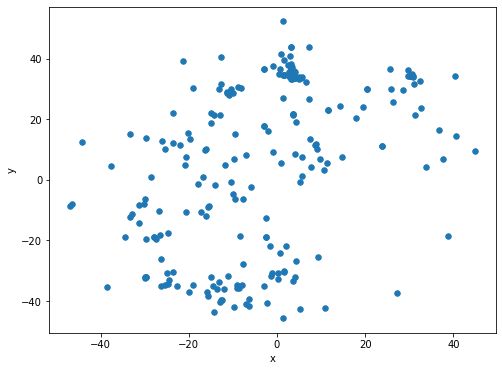

In [8]:
# # plain word2vec t-SNE Visualization
# from sklearn.manifold import TSNE
# word2vec_model=model

# skip=0
# limit=241 

# vocab = word2vec_model.wv.vocab
# emb_tuple = tuple([word2vec_model[v] for v in vocab])
# X = np.vstack(emb_tuple)

# tsne_model = TSNE(n_components=2, random_state=0,verbose=2)
# np.set_printoptions(suppress=True)
# tsne_model.fit_transform(X)
%matplotlib inline
plain_tsne = pd.DataFrame(tsne_model.embedding_[skip:limit, 0],columns = ["x"])
plain_tsne["y"] = pd.DataFrame(tsne_model.embedding_[skip:limit, 1])
plain_tsne["word"] = list(vocab)[skip:limit]
# plain_tsne["cluster"] = idx[skip:limit] # クラスタを計算し終わったあとならここでクラスタを付与できます
# plain_tsne.plot.scatter(x="x",y="y",c="cluster",cmap="viridis",figsize=(8, 6),s=30)
plain_tsne.plot.scatter(x="x",y="y",figsize=(8, 6),s=30)